In [1]:
import pandas as pd
from source.read_data import read_data
from source.calculate_rsi import calculate_rsi
from source.calculate_macd import calculate_macd_signal
from source.generate_positions_macd import generate_positions_macd
from source.hrp import calculate_hrp_weights
from source.backtest import run_backtest
from source.metrics import calculate_portfolio_metrics

# Backtesting Trade Strategy

In [ ]:
# Read price data
prices_close, prices_open = read_data(use_backup = True)
# Calculate RSI data
rsi_close = calculate_rsi(prices_close, "sma", 14)
macd_signal = calculate_macd_signal(prices_close)
# Generate positions_signals
positions_signals = generate_positions_macd(macd_signal, rsi_close, entry_rsi_range = (25, 50), exit_rsi_range = (80, 100))
# Run backtest
weights = calculate_hrp_weights(prices_close, rolling = 50)
portfolio, portfolio_value, trade_count = run_backtest(positions_signals, prices_open, prices_close, weights = weights, allocation_method = "hrp")
aum = portfolio_value.sum(axis = 1)
# Run metrics
metrics, metadata = calculate_portfolio_metrics(aum, trade_count, portfolio, prices_open)
final_metrics = pd.Series(metrics).round(4)

final_metrics

Total Return                   0.2976
Annualised Return              0.0062
Annualised Volatility          0.0142
Maximum Drawdown               0.0631
Sharpe Ratio                  -0.9762
Sortino Ratio                 -1.4788
Total Number of Trades       833.0000
Average Return per Trade       0.0004
Win Rate                       0.7970
Expectancy                  2237.8385
dtype: float64

In [3]:
from config import CAPITAL_0, BACKTEST_START, BACKTEST_END
import yfinance as yf
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'NAV')

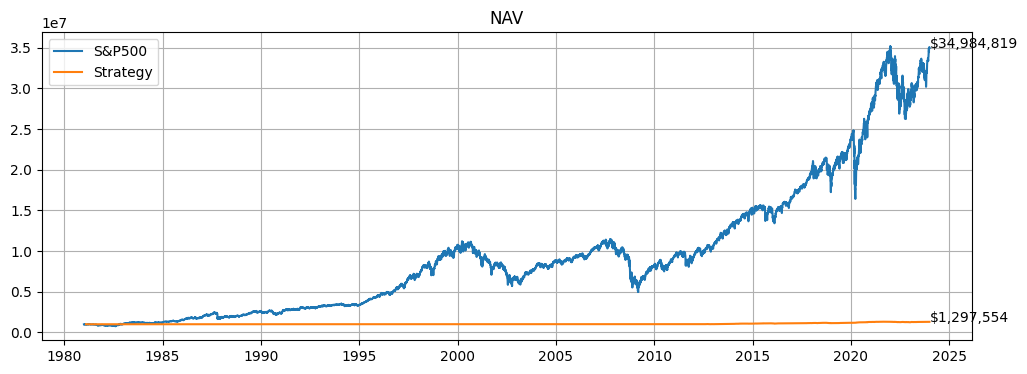

In [4]:
sp500 = yf.Ticker("^GSPC").history(start = BACKTEST_START, end = BACKTEST_END, auto_adjust = True)
sp500_investment = sp500.loc[:, "Close"] / sp500.loc[:, "Close"].iloc[0] * CAPITAL_0

fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(sp500_investment, label = "S&P500")
ax.plot(aum, label = "Strategy")
ax.text(s = f"${round(sp500_investment.iloc[-1]):,}", x = BACKTEST_END, y = sp500_investment.iloc[-1])
ax.text(s = f"${round(aum.iloc[-1]):,}", x = BACKTEST_END, y = aum.iloc[-1])
ax.legend()
ax.grid()
ax.set_title("NAV")